Assignment:
For Learning Objective 1, you could pick a new data set and explore it, asking questions about them and seeking to answer it. Learning Objective 1: I can use the tools of the PyData stack to understand, interpret, and visualize datasets, including making arguments about its underlying distributions.

### Citations
* Data uploaded and documentation used from Sci-kit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
* Code used as background information: https://matplotlibguide.readthedocs.io/en/latest/Matplotlib/types.html

In [1]:
#Importing all important functionality
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import LinearRegression

#Import dataset
diabetes = datasets.load_diabetes()

In [2]:
#Import data, convert it into a dataframe, print out a description of the data
X = diabetes.data

df = pd.DataFrame(X, columns=diabetes['feature_names'])

print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In the above code block, I print out a description of the dataset. From here, I can plan out my next steps. First, I need to rename the target feature from 'target' to something more descriptive, perhaps along the lines of 'progression'. Next, I plan to create visual representations of the relationship between disease progression and other features, such as age, sex or BMI. From this description, I do not have any ethical concerns, but I will need to take a careful look at the sex feature and remain conscious of my use of that feature.

In [3]:
#Add disease progression column
df['Progression'] = diabetes['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df['age'].describe()

count    4.420000e+02
mean    -3.634285e-16
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64

In the above code block, I print out a description of the age feature and some of the math behind it. Immediately, I notice that the age values have been standardized and while no longer correspond directly to whole numbers that normally define age, the difference between the ages should be mainatined. However, a look into this standarization process could be beneficial towards gaining a better understanding of the feature and finding any potential biases in how the data was modified.

Text(0, 0.5, 'Progression')

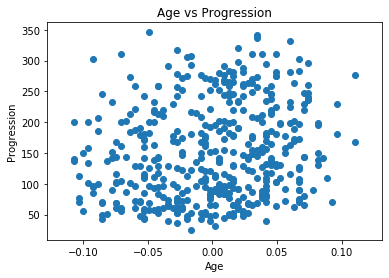

In [5]:
#Scatter Plot comparing age and progression to examine potential as an indicator of risk for disease
plt.scatter(df['age'], df['Progression'])
plt.title("Age vs Progression")
plt.xlabel("Age")
plt.ylabel("Progression")

In the above block, I created a scatter plot comparing disease progression to age. I did this because I thought that there may be a correlation between age and progression, as perhaps those who are older do not have the same physical capabilities to fight of the disease as younger people. However, this plot shows that my original thinking was 100% wrong. Despite being wrong, I am excited by this lack of correlation, as people's ability to fight the diease may not worsen as the grow older, which gives everyone a better chance of fighting diease.

(array([25., 41., 34., 28., 23., 19., 11., 13.,  6.,  2.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

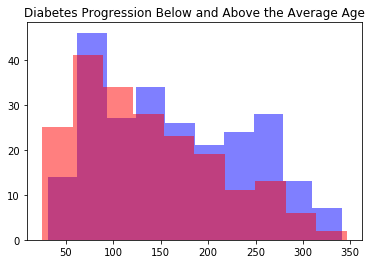

In [6]:
#Find the average age, plot a histogram contrasting progression in older people vs younger people
age_average = sum(df['age']) / 442
plt.title("Diabetes Progression Below and Above the Average Age")
plt.hist(df[df["age"] > age_average]["Progression"], alpha=0.5, color='b')
plt.hist(df[df["age"] < age_average]["Progression"], alpha=0.5, color='r')

In the above code, I create a histogram examining diease progression based on relationship to average age. The large amount of overlap in this graph agrees with the data found in the previous scatter plot that age and disease progression have little to do with each other. This contradicts my original guess that there would be a sharper difference once sorted by average age.

In [7]:
#Acquiring data to be used in cell below to graph in a pie chart
df['age'].describe()

count    4.420000e+02
mean    -3.634285e-16
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64

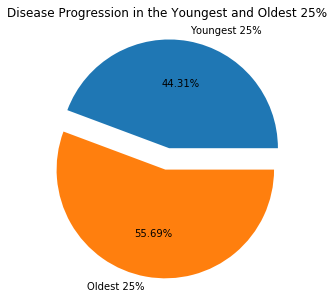

In [8]:
#Code from https://matplotlibguide.readthedocs.io/en/latest/Matplotlib/types.html used as background information and example
#Create a pie chart finding what % of people from each age group have the lowest progression
youngest25 = df['age'] < -3.729927e-02
youngest25_progression = sum(df['Progression'][youngest25]) / 111
oldest25 = df['age'] > 3.807591e-02
oldest25_progression = sum(df['Progression'][oldest25]) / 103
x = [youngest25_progression, oldest25_progression]
dataName = ['Youngest 25%', 'Oldest 25%']
explode = [0.1, 0.1] 

plt.figure(figsize=(5,5))
plt.title("Disease Progression in the Youngest and Oldest 25%")
plt.pie(x, explode=explode, labels=dataName, autopct='%.2f%%') 
plt.show()

The above histogram and pie chart indicate that age does not have a significant effect on the progression of diabetes, which I did not expect. The level of progression in the oldest 25% of the dataset is very similar to that of the youngest 25%, and the distribution of progression above and below the average age is the same, which aligns with the fundings of previous graphs.

Text(0, 0.5, 'Progression')

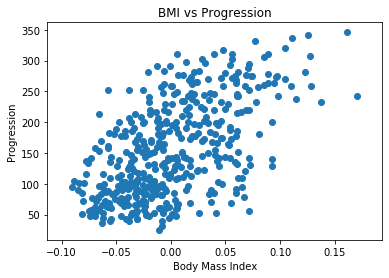

In [9]:
#Scatter plot comparing body mass index and progression to examine potential as an indicator of risk for disease
plt.scatter(df['bmi'], df['Progression'])
plt.title("BMI vs Progression")
plt.xlabel("Body Mass Index")
plt.ylabel("Progression")

In the above code block, I created a scatter plot comparing body mass index to disease progression. This plot shows that, unlike age, there is actually a relatively strong correlation between BMI and disease progression. By examining this relationship more, we can see if this relationship is truly correlation or causation. Also, an examination of this relationship opens many doors for further research and even possible treatment to slow down disease progression if BMI does have a large effect.